<a href="https://colab.research.google.com/github/s1111e/ComputerVision/blob/main/Object_Tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION 4 — Tracking Models (4 Methods)


In [ ]:
# 1. Mount Google Drive

#from google.colab import drive
#drive.mount('/content/drive')

# 2. Define project folder
import os

PROJECT_ROOT = "./"
#PROJECT_ROOT = "/content/drive/My Drive/Colab Notebooks/CV Project"
DATA_ROOT    = os.path.join(PROJECT_ROOT, "Data/kitti_tracking")



print("PROJECT_ROOT:", PROJECT_ROOT)
print("DATA_ROOT   :", DATA_ROOT)

IMAGE_DIR = os.path.join(DATA_ROOT, "data_tracking_image_2/training/image_02")
LABEL_DIR = os.path.join(DATA_ROOT, "data_tracking_label_2/training/label_02")
CALIB_DIR = os.path.join(DATA_ROOT, "data_tracking_calib/training/calib")

print("IMAGE_DIR:", IMAGE_DIR)
print("LABEL_DIR:", LABEL_DIR)
print("CALIB_DIR:", CALIB_DIR)




PROJECT_ROOT: ./
DATA_ROOT   : ./Data/kitti_tracking
IMAGE_DIR: ./Data/kitti_tracking\data_tracking_image_2/training/image_02
LABEL_DIR: ./Data/kitti_tracking\data_tracking_label_2/training/label_02
CALIB_DIR: ./Data/kitti_tracking\data_tracking_calib/training/calib


In [ ]:
!git clone https://github.com/ZQPei/deep_sort_pytorch.git deep_sort_pytorch

!pip install scikit-image lap filterpy


Cloning into 'deep_sort_pytorch'...
Updating files:  37% (87/229)
Updating files:  38% (88/229)
Updating files:  39% (90/229)
Updating files:  40% (92/229)
Updating files:  41% (94/229)
Updating files:  42% (97/229)
Updating files:  43% (99/229)
Updating files:  44% (101/229)
Updating files:  45% (104/229)
Updating files:  46% (106/229)
Updating files:  47% (108/229)
Updating files:  48% (110/229)
Updating files:  49% (113/229)
Updating files:  50% (115/229)
Updating files:  51% (117/229)
Updating files:  52% (120/229)
Updating files:  53% (122/229)
Updating files:  54% (124/229)
Updating files:  55% (126/229)
Updating files:  56% (129/229)
Updating files:  57% (131/229)
Updating files:  58% (133/229)
Updating files:  59% (136/229)
Updating files:  60% (138/229)
Updating files:  61% (140/229)
Updating files:  62% (142/229)
Updating files:  63% (145/229)
Updating files:  63% (146/229)
Updating files:  64% (147/229)
Updating files:  65% (149/229)
Updating files:  66% (152/229)
Updating f

In [ ]:
pip install opencv-python


  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl (39.0 MB)
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ------------ --------------------------- 4.2/12.9 MB 27.9 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 50.6 MB/s  0:00:00

  Attempting uninstall: numpy

    Found existing installation: numpy 2.3.5

   ---------------------------------------- 0/2 [numpy]
    Uninstalling numpy-2.3.5:
   ---------------------------------------- 0/2 [numpy]
      Successfully uninstalled numpy-2.3.5
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   -----------------------

  You can safely remove it manually.
  You can safely remove it manually.


In [ ]:
import numpy as np
import cv2
import os
from deep_sort.deep_sort.tracker import Tracker


# ReID model path (DeepSORT default)
REID_MODEL = "/content/deep_sort/deep_sort/deep/checkpoint/ckpt.t7"

# Initialize DeepSORT tracker
tracker = Tracker(
    max_iou_distance=0.7,
    max_age=30,
    n_init=3,
    nn_budget=100
)

print("DeepSORT initialized on:", "GPU" if torch.cuda.is_available() else "CPU")


TypeError: Tracker.__init__() got an unexpected keyword argument 'nn_budget'

In [ ]:
import inspect
import deep_sort.deep_sort.tracker as T

print([name for name, obj in inspect.getmembers(T) if inspect.isclass(obj)])


['Track', 'Tracker']


In [ ]:
def xyxy_to_xywh(box):
    x1, y1, x2, y2 = box
    w = x2 - x1
    h = y2 - y1
    cx = x1 + w/2
    cy = y1 + h/2
    return [cx, cy, w, h]


In [ ]:
pip install ultralytics --upgrade


  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 10.5 MB/s  0:00:00
   ---------------------------------------- 0.0/783.6 kB ? eta -:--:--
   ---------------------------------------- 783.6/783.6 kB 32.6 MB/s  0:00:00
   ---------------------------------------- 0.0/41.3 MB ? eta -:--:--
   ------------ --------------------------- 12.6/41.3 MB 71.6 MB/s eta 0:00:01
   --------------- ------------------------ 16.5/41.3 MB 41.6 MB/s eta 0:00:01
   -------------------- ------------------- 21.5/41.3 MB 36.7 MB/s eta 0:00:01
   --------------------------- ------------ 28.3/41.3 MB 34.5 MB/s eta 0:00:01
   --------------------------------- ------ 34.9/41.3 MB 34.1 MB/s eta 0:00:01
   ---------------------------------------- 41.3/41.3 MB 35.5 MB/s  0:00:01
   ---------------------------------------- 0.0/111.0 MB ? eta -:--:--
   -------- ---------------------

In [ ]:
import os
import cv2
from ultralytics import YOLO
from deep_sort_realtime.deepsort_tracker import DeepSort

# === CONFIG === #
IMAGE_DIR = r"Data/kitti_tracking/data_tracking_image_2/training/image_02"       # Sequence frame path root
SAVE_DIR  = r"tracking_outputs"                  # Output videos save location

os.makedirs(SAVE_DIR, exist_ok=True)


def run_deepsort_tracking(yolo_model, seq_id, output_name):
    seq_path = os.path.join(IMAGE_DIR, seq_id)
    video_path = os.path.join(SAVE_DIR, f"{output_name}.mp4")

    frames = sorted(os.listdir(seq_path))
    if len(frames) == 0:
        print("No frames found:", seq_path)
        return

    frame0 = cv2.imread(os.path.join(seq_path, frames[0]))
    h, w, _ = frame0.shape

    writer = cv2.VideoWriter(
        video_path,
        cv2.VideoWriter_fourcc(*"mp4v"),
        12,
        (w, h)
    )

    tracker = DeepSort(max_age=20, n_init=3, nms_max_overlap=1.0)

    for fr in frames:
        img_path = os.path.join(seq_path, fr)

        frame = cv2.imread(img_path)

        # YOLO detection
        results = yolo_model(frame, verbose=False)[0]

        dets = []
        for b in results.boxes:
            x1, y1, x2, y2 = b.xyxy[0].tolist()
            conf = float(b.conf)
            cls  = int(b.cls)

            if conf > 0.25:
                # --- DEEPSORT FORMAT ---
                w = x2 - x1
                h = y2 - y1
                dets.append(([x1, y1, w, h], conf, cls))

        # Update tracker using LTWH format
        tracks = tracker.update_tracks(dets, frame=frame)

        for t in tracks:
            if not t.is_confirmed():
                continue

            x1, y1, x2, y2 = map(int, t.to_ltrb())
            tid = t.track_id

            cv2.rectangle(frame,(x1,y1),(x2,y2),(0,255,0),2)
            cv2.putText(frame,f"ID {tid}",(x1,y1-8),
                        cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)

        writer.write(frame)

    writer.release()
    print("[✔] Saved:", video_path)


In [ ]:
# Load YOLO models
yolo_pretrained = YOLO("yolo11n.pt")   # or yolov11_pretrained.pt
yolo_finetuned  = YOLO("trained_models/yolo11_kitti/weights/best.pt")

SEQ = "0001"

run_deepsort_tracking(yolo_pretrained, SEQ, "pretrained_tracking")
run_deepsort_tracking(yolo_finetuned,  SEQ, "finetuned_tracking")


[✔] Saved: tracking_outputs\pretrained_tracking.mp4
[✔] Saved: tracking_outputs\finetuned_tracking.mp4


In [ ]:
print(sorted(os.listdir(IMAGE_DIR + "/0001"))[:20])


import cv2, os
frame0 = cv2.imread(IMAGE_DIR + "/0001/" + sorted(os.listdir(IMAGE_DIR + "/0001"))[0])
print(frame0.shape)

frames = sorted(os.listdir(IMAGE_DIR + "/0001"))
print(frames[:10])
print(frames[-10:])


['000000.png', '000001.png', '000002.png', '000003.png', '000004.png', '000005.png', '000006.png', '000007.png', '000008.png', '000009.png', '000010.png', '000011.png', '000012.png', '000013.png', '000014.png', '000015.png', '000016.png', '000017.png', '000018.png', '000019.png']
(375, 1242, 3)
['000000.png', '000001.png', '000002.png', '000003.png', '000004.png', '000005.png', '000006.png', '000007.png', '000008.png', '000009.png']
['000437.png', '000438.png', '000439.png', '000440.png', '000441.png', '000442.png', '000443.png', '000444.png', '000445.png', '000446.png']


# SECTION 5 — Tracking Evaluation (MOTA/MOTP/ID-Switch)

In [ ]:
def load_kitti_gt(file_path):
    data = []
    with open(file_path, "r") as f:
        for line in f:
            vals = line.strip().split()

            # Skip DontCare
            if vals[2] == "DontCare":
                continue

            frame = int(vals[0])
            tid   = int(vals[1])

            # KITTI format: x1 y1 x2 y2 = vals[6:10]
            x1 = float(vals[6])
            y1 = float(vals[7])
            x2 = float(vals[8])
            y2 = float(vals[9])

            w = x2 - x1
            h = y2 - y1

            data.append([frame, tid, x1, y1, w, h])

    return np.array(data)


In [ ]:
def load_kitti_pred(file_path):
    data = []
    with open(file_path, "r") as f:
        for line in f:
            vals = line.strip().split()

            frame = int(vals[0])
            tid   = int(vals[1])
            x1    = float(vals[2])
            y1    = float(vals[3])
            w     = float(vals[4])
            h     = float(vals[5])

            data.append([frame, tid, x1, y1, w, h])

    return np.array(data)


In [ ]:
from scipy.optimize import linear_sum_assignment
import numpy as np

def iou(bb1, bb2):
    x1 = max(bb1[0], bb2[0])
    y1 = max(bb1[1], bb2[1])
    x2 = min(bb1[0] + bb1[2], bb2[0] + bb2[2])
    y2 = min(bb1[1] + bb2[3], bb2[1] + bb2[3])

    if x2 <= x1 or y2 <= y1:
        return 0.0

    inter = (x2 - x1) * (y2 - y1)
    area1 = bb1[2] * bb1[3]
    area2 = bb2[2] * bb2[3]

    return inter / (area1 + area2 - inter)


def evaluate_mot(gt_data, pred_data, iou_thres=0.5):
    frames = int(max(gt_data[:,0].max(), pred_data[:,0].max())) + 1

    IDSW = 0
    FN = FP = TP = 0

    last_match = {}

    for f in range(frames):
        g = gt_data[gt_data[:,0] == f]
        p = pred_data[pred_data[:,0] == f]

        # Cost = 1 - IOU
        cost_matrix = np.ones((len(g), len(p)))
        for i, gt in enumerate(g):
            for j, pr in enumerate(p):
                cost_matrix[i, j] = 1 - iou(gt[2:], pr[2:])

        assigned_gt = set()
        assigned_pr = set()

        if len(g) > 0 and len(p) > 0:
            row_ind, col_ind = linear_sum_assignment(cost_matrix)

            for r, c in zip(row_ind, col_ind):
                if cost_matrix[r, c] < (1 - iou_thres):
                    TP += 1
                    assigned_gt.add(r)
                    assigned_pr.add(c)

                    gt_id = g[r][1]
                    pr_id = p[c][1]

                    if gt_id in last_match and last_match[gt_id] != pr_id:
                        IDSW += 1

                    last_match[gt_id] = pr_id
                else:
                    FP += 1
                    FN += 1

        FP += len(p) - len(assigned_pr)
        FN += len(g) - len(assigned_gt)

    MOTA = 1 - (FN + FP + IDSW) / len(gt_data)
    Recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    IDF1 = TP / (TP + 0.5*(FP + FN)) if (TP + 0.5*(FP + FN)) > 0 else 0

    return {
        "MOTA": round(MOTA, 4),
        "IDF1": round(IDF1, 4),
        "ID-switches": IDSW,
        "FN": FN,
        "FP": FP,
        "Recall": round(Recall, 4),
        "Precision": round(Precision, 4)
    }


In [ ]:
SEQ = "0001"

gt   = load_kitti_gt(f"{GT_DIR}/{SEQ}.txt")
pred = load_kitti_pred(f"{PRED_DIR}/{SEQ}.txt")

# DeepSORT confirmed frame offset fix
pred[:,0] -= 2
pred = pred[pred[:,0] >= 0]

results = evaluate_mot(gt, pred)

for k, v in results.items():
    print(k, ":", v)


MOTA : -1.9099
IDF1 : 0.314
ID-switches : 176
FN : 2081
FP : 6560
Recall : 0.4873
Precision : 0.2317


###FINE-TUNED YOLO MODEL

In [ ]:
run_tracking_and_save_kitti(yolo_finetuned, "0001", "tracking_kitti_finetuned")


In [ ]:
pred = load_kitti_pred("tracking_kitti_finetuned/0001.txt")

pred[:,0] -= 2
pred = pred[pred[:,0] >= 0]

results_finetuned = evaluate_mot(gt, pred)


In [ ]:
pred = load_kitti_pred("tracking_kitti_finetuned/0001.txt")
pred[:,0] -= 2
pred = pred[pred[:,0] >= 0]

results_finetuned = evaluate_mot(gt, pred)
for k,v in results_finetuned.items():
    print(k,":",v)


MOTA : -0.6587
IDF1 : 0.459
ID-switches : 49
FN : 1771
FP : 3206
Recall : 0.5438
Precision : 0.397


# SECTION 6 — Final Visualization + Report

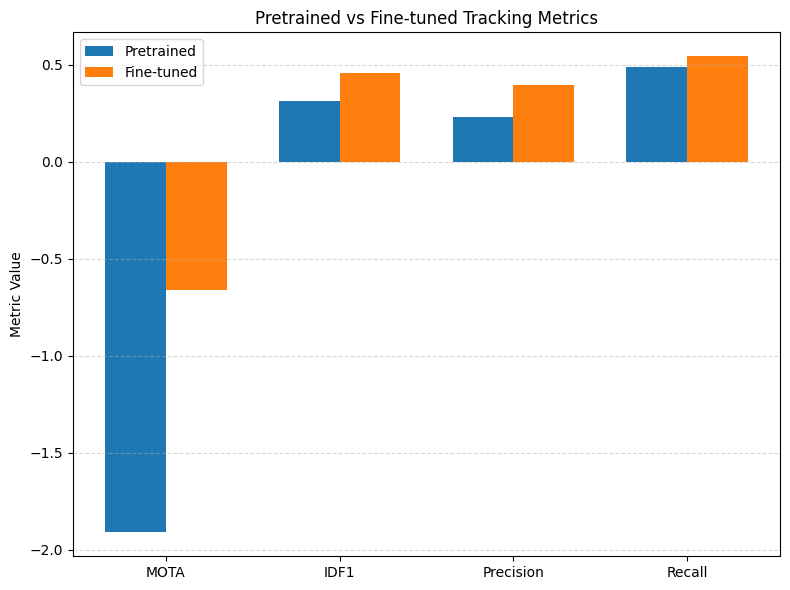

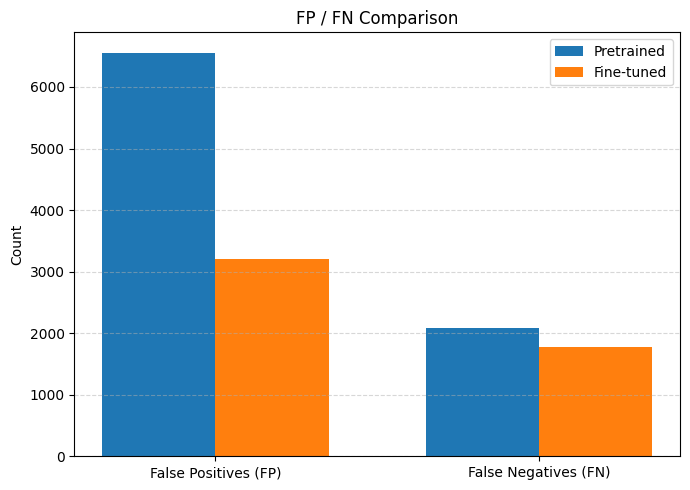

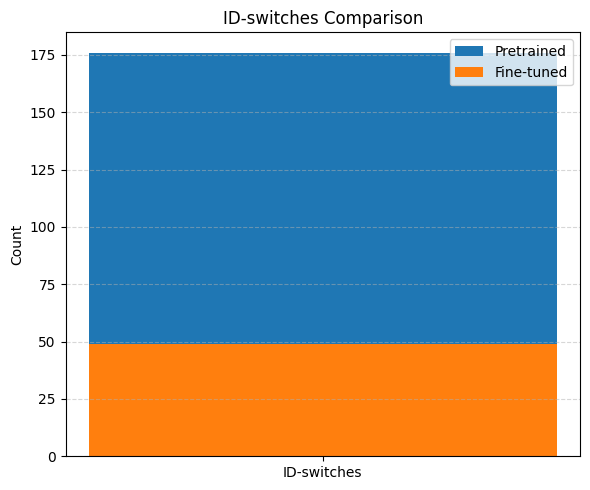

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



# 1) Main metrics to visualize
metric_keys = ["MOTA", "IDF1", "Precision", "Recall"]

pretrained_vals = np.array([results[k] for k in metric_keys])
finetuned_vals  = np.array([results_finetuned[k] for k in metric_keys])

# 2) FP, FN, ID-switches
fp_pre  = results["FP"]
fp_ft   = results_finetuned["FP"]

fn_pre  = results["FN"]
fn_ft   = results_finetuned["FN"]

ids_pre = results["ID-switches"]
ids_ft  = results_finetuned["ID-switches"]


# ======================
# 1) MAIN METRICS BAR CHART
# ======================
plt.figure(figsize=(8,6))
x = np.arange(len(metric_keys))
width = 0.35

plt.bar(x - width/2, pretrained_vals, width, label="Pretrained")
plt.bar(x + width/2, finetuned_vals, width, label="Fine-tuned")

plt.xticks(x, metric_keys)
plt.ylabel("Metric Value")
plt.title("Pretrained vs Fine-tuned Tracking Metrics")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


# ======================
# 2) FP / FN BAR CHART
# ======================
plt.figure(figsize=(7,5))
labels = ["False Positives (FP)", "False Negatives (FN)"]
pre_vals = [fp_pre, fn_pre]
ft_vals  = [fp_ft, fn_ft]

x2 = np.arange(len(labels))

plt.bar(x2 - width/2, pre_vals, width, label="Pretrained")
plt.bar(x2 + width/2, ft_vals, width, label="Fine-tuned")

plt.xticks(x2, labels)
plt.ylabel("Count")
plt.title("FP / FN Comparison")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


# ======================
# 3) ID-SWITCHES BAR CHART
# ======================
plt.figure(figsize=(6,5))

plt.bar(["ID-switches"], [ids_pre], width, label="Pretrained")
plt.bar(["ID-switches"], [ids_ft],  width, label="Fine-tuned")

plt.title("ID-switches Comparison")
plt.ylabel("Count")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


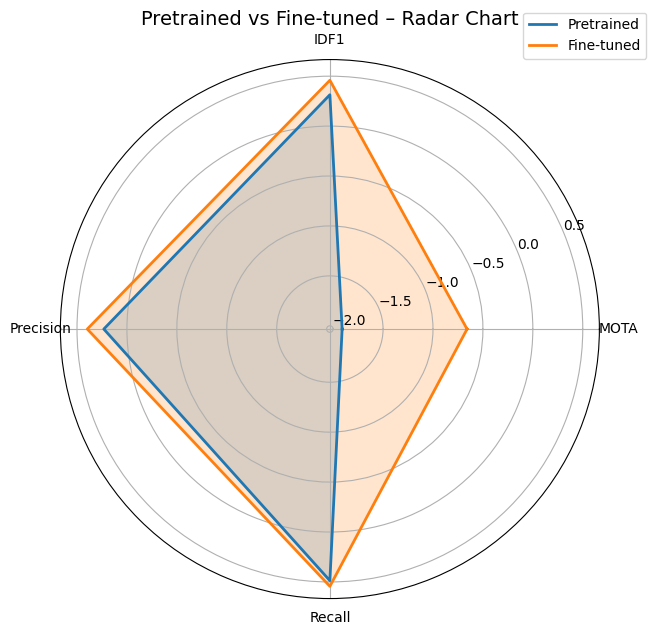

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================
# Using existing metric dictionaries:
# results  -> pretrained
# results_finetuned -> fine-tuned
# ==========================

# Metrics to plot
metrics = ["MOTA", "IDF1", "Precision", "Recall"]

pre_vals = np.array([results[m] for m in metrics])
ft_vals  = np.array([results_finetuned[m] for m in metrics])

# Radar chart setup
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
pre_vals = np.concatenate((pre_vals, [pre_vals[0]]))
ft_vals  = np.concatenate((ft_vals,  [ft_vals[0]]))
angles  += angles[:1]

fig, ax = plt.subplots(figsize=(7,7), subplot_kw=dict(polar=True))

ax.plot(angles, pre_vals, label="Pretrained", linewidth=2)
ax.fill(angles, pre_vals, alpha=0.2)

ax.plot(angles, ft_vals, label="Fine-tuned", linewidth=2)
ax.fill(angles, ft_vals, alpha=0.2)

ax.set_thetagrids(np.degrees(angles[:-1]), metrics)
ax.set_title("Pretrained vs Fine-tuned – Radar Chart", fontsize=14)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()
